1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

2. Загрузите датасет в pandas DataFrame под названием df.

3. Выполните предварительную обработку данных, выполнив следующие шаги: 

* a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 
* b. Проверьте и обработайте любые дублирующиеся строки в датасете. 
* c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 

* a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 
* b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 
* c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 
* d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

5. Выполните проектирование признаков путем реализации следующих преобразований: 

* a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 
* b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Посмотрим, какие типы данных используются в столбцах и как много пропусков.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()[df.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

LotFrontage(площадь фасада) имеет числовые значения или n/a. Заполним нулями значения n/a для объектов без фасада.

In [6]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

В столбцах alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature множество пропусков, они не релевантны для исследования. Данные столбы слебует исключить из анализируемого датасета. 

In [7]:
df = df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [11]:
df.isnull().sum()[df.isnull().sum() != 0]

MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [16]:
df[['MasVnrType', 'MasVnrArea','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


(array([939., 138., 126.,  93.,  56.,  38.,  13.,  16.,  10.,   9.,   3.,
          3.,   2.,   2.,   2.,   0.,   0.,   1.,   0.,   1.]),
 array([   0.,   80.,  160.,  240.,  320.,  400.,  480.,  560.,  640.,
         720.,  800.,  880.,  960., 1040., 1120., 1200., 1280., 1360.,
        1440., 1520., 1600.]),
 <BarContainer object of 20 artists>)

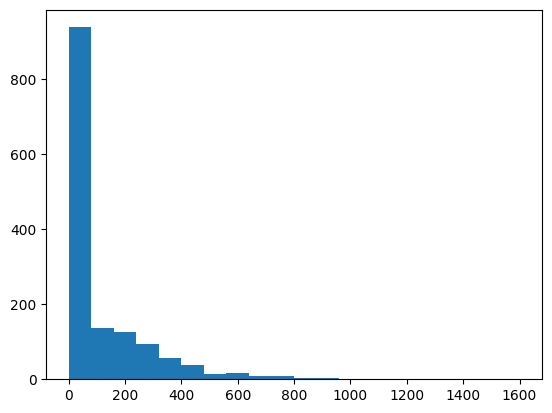

In [19]:
plt.hist(df['MasVnrArea'], bins=20)

In [20]:
# так как распределение MasVnrArea несимметричное, то отсутствующие значения заменяем медианными
MasVnrArea_m = df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].fillna(MasVnrArea_m)

(array([  1.,   5.,   9.,  19.,  28.,  21.,  17.,  35.,  29.,  64., 106.,
         89., 110.,  84.,  98.,  42.,  84., 106., 206., 226.]),
 array([1900. , 1905.5, 1911. , 1916.5, 1922. , 1927.5, 1933. , 1938.5,
        1944. , 1949.5, 1955. , 1960.5, 1966. , 1971.5, 1977. , 1982.5,
        1988. , 1993.5, 1999. , 2004.5, 2010. ]),
 <BarContainer object of 20 artists>)

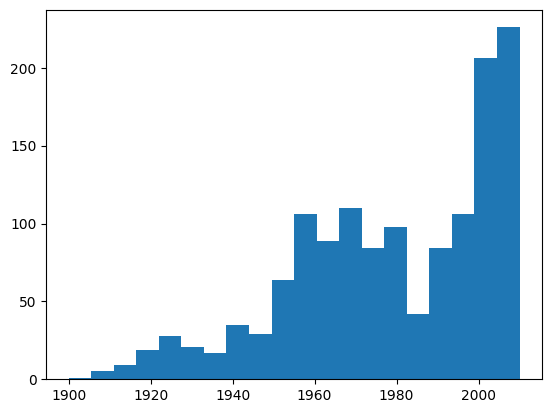

In [21]:
plt.hist(df['GarageYrBlt'], bins=20)

In [22]:
# так как распределение GarageYrBlt несимметричное, то отсутствующие значения заменяем медианными
GarageYrBlt_m = df['GarageYrBlt'].median()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(GarageYrBlt_m)

для категориальных признаков, отсутствующие значения заменяем 'None'

In [24]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['Electrical'] = df['Electrical'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')


In [25]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

Проработали пропуски и отсутствующие значения. Далее необходимо проработать дубликаты.

In [28]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Проверим типы данных. Они соответствуют ожидаемым, можно перевести float64 в int32 в двух строках касающихся площади, но площадь может иметь дробные значения.

### Проведите разведочный анализ данных (EDA)

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

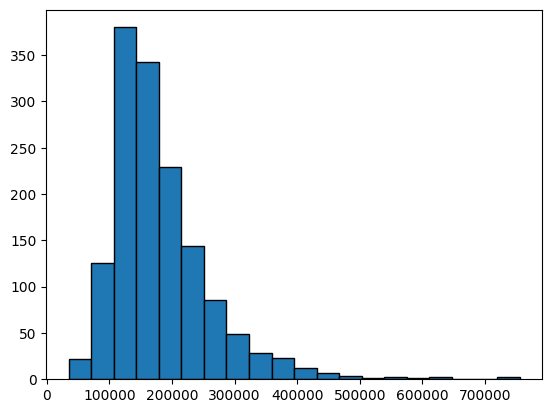

In [29]:
#  распределение целевой переменной 'SalePrice'
plt.hist(df['SalePrice'], bins=20, edgecolor='black')

по графику можно увидеть что-то похожее на нецентральное распределние, и наблюдаются выбросы.

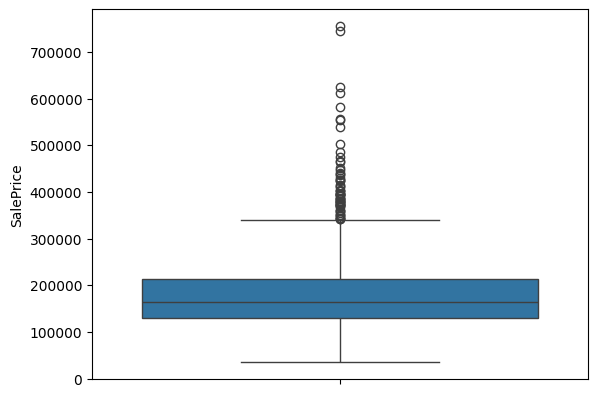

In [31]:
import seaborn as sns
sns.boxplot(df['SalePrice']);

In [32]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

SalePrice имеет распределение, близкое к нецентральному  x^2, имеет моду примерно 160 000 долларов, 25% и 75% перцентили 130 000 и 215 000 долларов соответственно. Есть выбросы при значении цены около 750000 долларов.

In [39]:
# Исследуйте взаимосвязи между целевой переменной и другими характеристиками.
corr = df.corr(numeric_only=True)
corr = round(corr, 1)
corr[abs(corr) < 0.4] = 0
corr['SalePrice']

Id               0.0
MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.8
OverallCond      0.0
YearBuilt        0.5
YearRemodAdd     0.5
MasVnrArea       0.5
BsmtFinSF1       0.4
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.6
1stFlrSF         0.6
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.7
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.6
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.5
Fireplaces       0.5
GarageYrBlt      0.5
GarageCars       0.6
GarageArea       0.6
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SalePrice        1.0
Name: SalePrice, dtype: float64

целевая функция SalePrice (продажная цена) имеет сильную корреляцию (более 0.5) с параметрами OverallQual(0.8), TotalBsmtSF(0.6), 1stFlrSF(0.6), GrLivArea(0.7), FullBath(0.6), GarageCars(0.6), GarageArea(0.6). Максимальная корреляция (0.8) с параметром OverallQual (общее качество)     

Взаимосвязи параметров определяются по таблице корреляций, построенной выше.

OverallQual имеет сильную корреляцию (более 0.5) с параметрами YearBuilt, YearRemodAdd, GrLivArea, FullBath, GarageCars, GarageArea, SalePrice. Максимальная корреляция (0.8) - с параметром SalePrice (продажная цена)

GrLivArea (общая жилая площадь) имеет сильную корреляцию (более 0.5) с параметрами OverallQual, 1stFlrSF, 2stFlrSF, FullBath, TotRmsAbvGrd, SalePrice. Максимальная корреляция (0.8) - с параметром TotRmsAbvGrd (число комнат выше уровня земли)

GarageCars (вместимость гаража) имеет сильную корреляцию (более 0.5) с параметрами OverallQual, SalePrice, GarageArea. Максимальная корреляция (0.9) - с параметром GarageArea (площадь гаража)

(array([  2.,   0.,   3.,   0.,  20.,   0., 116.,   0., 397.,   0.,   0.,
        374.,   0., 319.,   0., 168.,   0.,  43.,   0.,  18.]),
 array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
         5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
         9.1 ,  9.55, 10.  ]),
 <BarContainer object of 20 artists>)

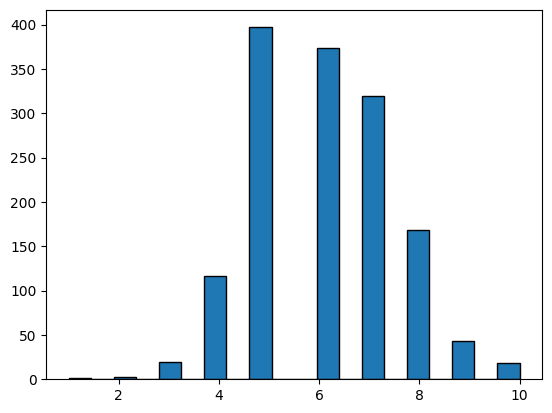

In [40]:
plt.hist(df['OverallQual'], bins=20, edgecolor='black')

(array([  4., 103., 259., 295., 304., 231., 124.,  65.,  41.,  16.,   8.,
          4.,   2.,   0.,   0.,   2.,   1.,   0.,   0.,   1.]),
 array([ 334. ,  599.4,  864.8, 1130.2, 1395.6, 1661. , 1926.4, 2191.8,
        2457.2, 2722.6, 2988. , 3253.4, 3518.8, 3784.2, 4049.6, 4315. ,
        4580.4, 4845.8, 5111.2, 5376.6, 5642. ]),
 <BarContainer object of 20 artists>)

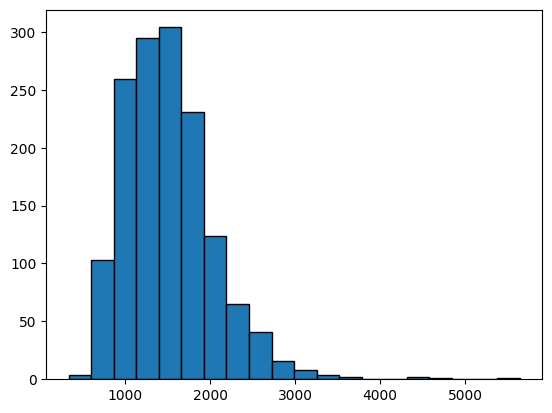

In [41]:
plt.hist(df['GrLivArea'], bins=20, edgecolor='black')

In [42]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [43]:
# one-hot encoding:
df = pd.get_dummies(df, columns=['Utilities'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   LotShape          1460 non-null   object 
 7   LandContour       1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   int64  
 16  OverallCond       1460 non-null   int64  


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
# label encoding:
le = LabelEncoder()
df['MSZoning'] = le.fit_transform(df['MSZoning'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   int32  
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   LotShape          1460 non-null   object 
 7   LandContour       1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   int64  
 16  OverallCond       1460 non-null   int64  


При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [47]:
df['TotalArea'] = df['TotalBsmtSF'] + df['GrLivArea'] + df['GarageArea']
df['TotalArea'].head()

0    3114
1    2984
2    3314
3    3115
4    4179
Name: TotalArea, dtype: int64

In [48]:
import datetime

currentDateTime = datetime.datetime.now()
df['Age'] = - df['YearBuilt'] + currentDateTime.year
df['Age'].head()

0     21
1     48
2     23
3    109
4     24
Name: Age, dtype: int64

In [49]:
df.to_csv('cleaned_house_prices.csv', index=False)